# Rabbits vs Sheeps

Considering the dynamic system
$$
\dot{x} = x(3 - ax - by)
$$

$$
\dot{y} = y(2 - x - y)
$$

describing the competition between rabbits `x` and sheeps `y` for the same resources in one given environment, with:

- `a > 0` inverse of the carrying capacity of the environment for rabbits;
- `b > 0` coefficient of competition

The considered case is when `a = 2` and `b = 1`.


## Fixed points and Stability

Knowing the values of `a` and `b`, there is:

$$
\dot{x} = x(3 - 2x - y)
$$

$$
\dot{y} = y(2 - x - y)
$$

To identify the equilibrium points, the two equations are to be solved simultaneously:



In [2]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import sympy as sp
from scipy.integrate import solve_ivp
from IPython.display import Math, display

The `calculate_equilibria` function defines symbolic variables and equations:


In [3]:
def calculate_equilibria():
    x, y = sp.symbols("x y")

    # Define the system:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Find equilibrium points by solving dx_dt = 0 and dy_dt = 0:

    # Case 1: x = 0
    eq1 = sp.solve(dy_dt.subs(x, 0), y)
    points_x0 = [(0, float(y_val)) for y_val in eq1]

    # Case 2: y = 0
    eq2 = sp.solve(dx_dt.subs(y, 0), x)
    points_y0 = [(float(x_val), 0) for x_val in eq2]

    # Case 3: Both factors non-zero
    eq3 = sp.solve([3 - 2 * x - y, 2 - x - y], [x, y])
    points_other = [(float(eq3[x]), float(eq3[y]))]

    # Combine all points and filter duplicates:
    all_points = points_x0 + points_y0 + points_other
    unique_points = []
    for p in all_points:
        if not any(np.allclose(p, existing) for existing in unique_points):
            unique_points.append(p)

    return unique_points

### System Function

The `system` function defines the system of differential equations:


In [4]:
def system(t, z):
    x, y = z

    # Derivative of the system's functions:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)
    return [dx_dt, dy_dt]

### Plotting Function

In [5]:
def plot_phase_portrait():

    # Calculating equilibrium points:
    equilibria = calculate_equilibria()
    print("Calculated equilibrium points:")
    for point in equilibria:
        dx, dy = system(0, point)
        print(f"({point[0]}, {point[1]})")

    # Creating a grid of points:
    x = np.linspace(-0.5, 3, 20)
    y = np.linspace(-0.5, 3, 20)
    X, Y = np.meshgrid(x, y)

    # Calculating derivatives at each point:
    DX, DY = np.zeros_like(X), np.zeros_like(Y)
    for i in range(len(x)):
        for j in range(len(y)):
            dx, dy = system(0, [X[j, i], Y[j, i]])
            DX[j, i] = dx
            DY[j, i] = dy

    # Normalizing for better visualization:
    M = np.sqrt(DX**2 + DY**2)
    M[M == 0] = 1  # Avoid division by zero error
    DX = DX / M
    DY = DY / M

    # Plot phase portrait:
    plt.figure(figsize=(10, 8))
    plt.quiver(X, Y, DX, DY, M, pivot="mid", cmap=plt.cm.viridis)
    plt.colorbar()

    # Plot equilibrium points:
    eq_x, eq_y = zip(*equilibria)
    plt.plot(eq_x, eq_y, "ro", markersize=8)

    # Plot some trajectories:
    initial_conditions = [
        (0.5, 0.5),
        (0.5, 1.5),
        (1.5, 1.5),
        (1.5, 0.5),
        (0.1, 0.1),
        (0.1, 2.1),
        (1.6, 0.1),
        (1.1, 1.1),
    ]

    t_span = (0, 10)
    t_eval = np.linspace(0, 10, 1000)

    for init in initial_conditions:
        sol = solve_ivp(system, t_span, init, t_eval=t_eval, method="RK45")
        plt.plot(sol.y[0], sol.y[1], "k-", linewidth=1)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Phase Portrait of the System")
    plt.grid(True)
    plt.axis([min(x), max(x), min(y), max(y)])
    plt.show()

    return equilibria

### Running the analysis

Calculated equilibrium points:
(0, 0.0)
(0, 2.0)
(1.5, 0)
(1.0, 1.0)


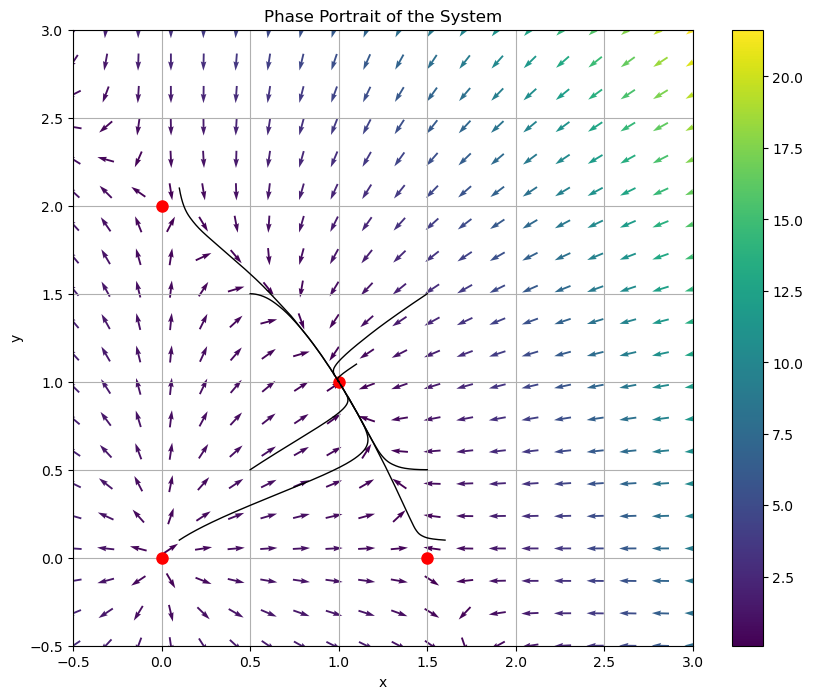

In [6]:
equilibria = plot_phase_portrait()

### Jacobian Matrix calculation
Calculate the Jacobian matrix and evaluate at all fixed points
using LaTeX display for all matrices

In [7]:
def calculate_jacobian_and_fixed_points():

    x, y = sp.symbols("x y")

    # Defining the system:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Calculating partial derivatives:
    df_dx = sp.diff(dx_dt, x)
    df_dy = sp.diff(dx_dt, y)
    dg_dx = sp.diff(dy_dt, x)
    dg_dy = sp.diff(dy_dt, y)

    # Creating the symbolic Jacobian matrix:
    symbolic_jacobian = sp.Matrix([[df_dx, df_dy], [dg_dx, dg_dy]])

    # Displaying the symbolic Jacobian in LaTeX:
    display(Math(r"J(x,y) = " + sp.latex(symbolic_jacobian)))

    # Getting equilibrium points:
    equilibria = calculate_equilibria()

    # Calculating and display Jacobian at each equilibrium point:
    for point in equilibria:
        x_val, y_val = point

        # Substituting values to get numerical Jacobian:
        J_at_point = symbolic_jacobian.subs([(x, x_val), (y, y_val)])

        # Calculating eigenvalues:
        eigenvalues = J_at_point.eigenvals()
        eigenvalues_list = list(eigenvalues.keys())

        # Displaying Jacobian at this point in LaTeX:
        display(Math(r"J({0}, {1}) = {2}".format(x_val, y_val, sp.latex(J_at_point))))

        # Displaying eigenvalues in LaTeX:
        display(Math(r"Eigenvalues: \lambda = " + sp.latex(eigenvalues_list)))

        # Determining stability based on eigenvalues:
        real_parts = [complex(ev).real for ev in eigenvalues_list]

        if all(r < 0 for r in real_parts):
            stability = "Stable (attracting)"
        elif all(r > 0 for r in real_parts):
            stability = "Unstable (repelling)"
        elif all(r == 0 for r in real_parts):
            stability = "Center or non-hyperbolic"
        else:
            stability = "Saddle point"

        print(f"Stability at ({x_val}, {y_val}): {stability}\n")

    return symbolic_jacobian

# Calculating and display Jacobian at all fixed points:
J = calculate_jacobian_and_fixed_points()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (0, 0.0): Unstable (repelling)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (0, 2.0): Saddle point



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (1.5, 0): Saddle point



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (1.0, 1.0): Stable (attracting)



The analysis of the eigenvectors also made it possible to identify linear varieties in the vicinity of the fixed points. For each fixed point and eigenvalue, the following system of differential equations was solved:

$$
\left[
\begin{array}{cc}
\frac{\partial \dot{x}}{\partial x} - \lambda & \frac{\partial \dot{x}}{\partial y} \\
\frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} - \lambda
\end{array}
\right]
\left[
\begin{array}{c}
v_1 \\
v_2
\end{array}
\right]
=
\left[
\begin{array}{c}
0 \\
0
\end{array}
\right]
$$

In [8]:
def calculate_eigenvectors():
    """
    Calculate eigenvectors for each fixed point and eigenvalue
    """

    # Define symbolic variables
    x, y = sp.symbols("x y")

    # Define the system
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Calculate the Jacobian matrix
    df_dx = sp.diff(dx_dt, x)
    df_dy = sp.diff(dx_dt, y)
    dg_dx = sp.diff(dy_dt, x)
    dg_dy = sp.diff(dy_dt, y)

    jacobian = sp.Matrix([[df_dx, df_dy], [dg_dx, dg_dy]])

    # Get equilibrium points
    equilibria = calculate_equilibria()

    print("Analysis of eigenvectors at fixed points:")
    print("----------------------------------------")

    for point in equilibria:
        x_val, y_val = point

        # Evaluate Jacobian at this fixed point
        J_at_point = jacobian.subs([(x, x_val), (y, y_val)])

        # Calculate eigenvalues and eigenvectors
        eigensystem = J_at_point.eigenvects()

        print(f"\nAt fixed point ({x_val}, {y_val}):")

        # Display the Jacobian at this point
        display(Math(r"J = " + sp.latex(J_at_point)))

        # Process each eigenvalue and its eigenvectors
        for eigenvalue, multiplicity, eigenvectors in eigensystem:
            # Display the eigenvalue and its multiplicity
            display(
                Math(
                    r"\lambda = "
                    + sp.latex(eigenvalue)
                    + r", \text{multiplicity} = "
                    + str(multiplicity)
                )
            )

            # For each eigenvalue, set up and display the eigenvector equation
            # (J - λI)v = 0
            lambda_I = eigenvalue * sp.eye(2)
            eigenvector_equation = J_at_point - lambda_I

            display(
                Math(
                    r"(J - \lambda I)v = "
                    + sp.latex(eigenvector_equation)
                    + r"\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}"
                )
            )

            # Display the eigenvectors
            for i, vec in enumerate(eigenvectors):
                # Normalize the eigenvector for cleaner display
                norm = sp.sqrt(sum(v**2 for v in vec))
                if norm != 0:
                    normalized_vec = vec / norm
                else:
                    normalized_vec = vec

                display(Math(r"v_{" + str(i + 1) + r"} = " + sp.latex(normalized_vec)))

                # Convert to numerical values for clarity
                numerical_vec = np.array(normalized_vec).astype(float)
                print(
                    f"Numerical eigenvector: [{numerical_vec[0, 0]:.4f}, {numerical_vec[1, 0]:.4f}]"
                )

            # Solve the system of differential equations for this eigenvalue
            # This is equivalent to finding the nullspace of (J - λI)
            print(f"Nullspace of (J - λI):")
            nullspace = eigenvector_equation.nullspace()

            for i, basis_vector in enumerate(nullspace):
                # Normalize for clarity
                norm = sp.sqrt(sum(v**2 for v in basis_vector))
                if norm != 0:
                    normalized_vec = basis_vector / norm
                else:
                    normalized_vec = basis_vector

                display(Math(r"v_{" + str(i + 1) + r"} = " + sp.latex(normalized_vec)))

        # Identify the linear varieties (eigenspaces)
        print("\nLinear varieties (eigenspaces):")
        for eigenvalue, _, eigenvectors in eigensystem:
            if len(eigenvectors) > 0:
                v = eigenvectors[0]
                # Normalize the eigenvector
                norm = sp.sqrt(sum(elem**2 for elem in v))
                if norm != 0:
                    v = v / norm

                # The equation of the line through the fixed point in the direction of v is:
                # (x-x0, y-y0) = t * v for t ∈ ℝ
                line_eq = f"(x-{x_val}, y-{y_val}) = t·({float(v[0]):.4f}, {float(v[1]):.4f}), t ∈ ℝ"
                print(f"Eigenvalue λ = {float(eigenvalue):.4f}: {line_eq}")

    return equilibria


# Calculate eigenvectors for all fixed points
calculate_eigenvectors()

Analysis of eigenvectors at fixed points:
----------------------------------------

At fixed point (0, 0.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.0000, 1.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [1.0000, 0.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = 2.0000: (x-0, y-0.0) = t·(0.0000, 1.0000), t ∈ ℝ
Eigenvalue λ = 3.0000: (x-0, y-0.0) = t·(1.0000, 0.0000), t ∈ ℝ

At fixed point (0, 2.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.8321, -0.5547]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.0000, 1.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = 1.0000: (x-0, y-2.0) = t·(0.8321, -0.5547), t ∈ ℝ
Eigenvalue λ = -2.0000: (x-0, y-2.0) = t·(0.0000, 1.0000), t ∈ ℝ

At fixed point (1.5, 0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [1.0000, 0.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [-0.3939, 0.9191]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = -3.0000: (x-1.5, y-0) = t·(1.0000, 0.0000), t ∈ ℝ
Eigenvalue λ = 0.5000: (x-1.5, y-0) = t·(-0.3939, 0.9191), t ∈ ℝ

At fixed point (1.0, 1.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.8507, 0.5257]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [-0.5257, 0.8507]
Nullspace of (J - λI):

Linear varieties (eigenspaces):
Eigenvalue λ = -2.6180: (x-1.0, y-1.0) = t·(0.8507, 0.5257), t ∈ ℝ
Eigenvalue λ = -0.3820: (x-1.0, y-1.0) = t·(-0.5257, 0.8507), t ∈ ℝ


[(0, 0.0), (0, 2.0), (1.5, 0), (1.0, 1.0)]

### Isoclines plotting

The isoclines are found when:
$$
\dot{x} = 0
$$
$$
\dot{y} = 0 
$$

which happens in the equilibria points. After verifying their coordinates, the plot of the isoclines will be created:

dx/dt = 0 when:
  - x = 0
  - y = 3 - 2x
dy/dt = 0 when:
  - y = 0
  - y = 2 - x


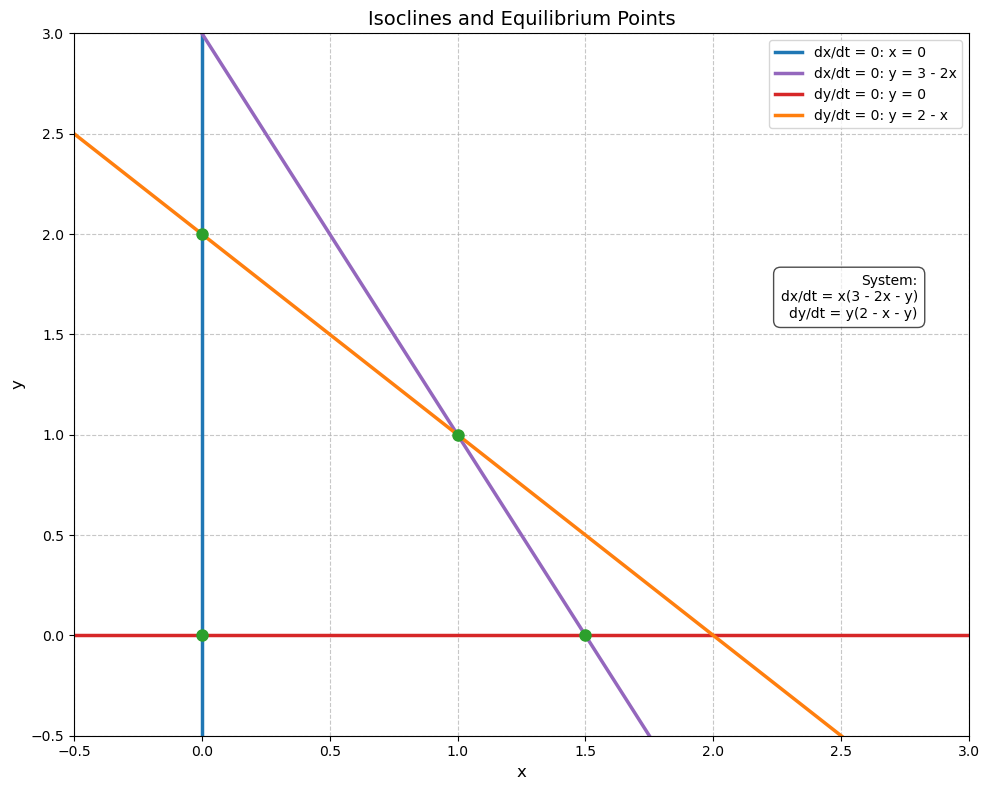


Equilibrium points (where both derivatives = 0):
Point 1: (0, 0)
Point 2: (0, 2)
Point 3: (1.5, 0)
Point 4: (1, 1)


In [9]:
def find_isoclines():
    """
    Find the isoclines (where dx/dt = 0 and dy/dt = 0) for the system:
    dx/dt = x(3 - 2x - y)
    dy/dt = y(2 - x - y)

    With enhanced color differentiation and fixed legend
    """

    # Defining symbolic variables and system:
    x, y = sp.symbols("x y")

    dx_dt_expr = x * (3 - 2 * x - y)
    dy_dt_expr = y * (2 - x - y)

    # Creating functions for dx/dt = 0 isoclines:
    dx_dt_isoclines = []

    # First solution: x = 0
    dx_dt_isoclines.append(
        lambda x: np.zeros_like(x)
    )

    # Second solution: y = 3 - 2x
    dx_dt_isoclines.append(lambda x: 3 - 2 * x)

    print("dx/dt = 0 when:")
    print("  - x = 0")
    print("  - y = 3 - 2x")

    # Creating functions for dy/dt = 0 isoclines:
    dy_dt_isoclines = []

    # First solution: y = 0
    dy_dt_isoclines.append(
        lambda x: np.zeros_like(x)
    )  # y = 0 (horizontal line at origin)

    # Second solution: y = 2 - x
    dy_dt_isoclines.append(lambda x: 2 - x)  # y = 2 - x

    print("dy/dt = 0 when:")
    print("  - y = 0")
    print("  - y = 2 - x")

    # Plotting:
    x_range = np.linspace(-0.5, 3, 100)

    plt.figure(figsize=(10, 8))

    # Colors
    colors = {
        "dx_dt_1": "#1f77b4",  # Blue
        "dx_dt_2": "#9467bd",  # Purple
        "dy_dt_1": "#d62728",  # Red
        "dy_dt_2": "#ff7f0e",  # Orange
        "equilibria": "#2ca02c",  # Green
    }

    # Plotting dx/dt = 0 isoclines:
    line1 = plt.axvline(
        x=0,
        color=colors["dx_dt_1"],
        linestyle="-",
        linewidth=2.5,
        label="dx/dt = 0: x = 0",
    )
    line2 = plt.plot(
        x_range,
        dx_dt_isoclines[1](x_range),
        color=colors["dx_dt_2"],
        linestyle="-",
        linewidth=2.5,
        label="dx/dt = 0: y = 3 - 2x",
    )[0]

    # Plotting dy/dt = 0 isoclines:
    line3 = plt.axhline(
        y=0,
        color=colors["dy_dt_1"],
        linestyle="-",
        linewidth=2.5,
        label="dy/dt = 0: y = 0",
    )
    line4 = plt.plot(
        x_range,
        dy_dt_isoclines[1](x_range),
        color=colors["dy_dt_2"],
        linestyle="-",
        linewidth=2.5,
        label="dy/dt = 0: y = 2 - x",
    )[0]

    # Defining equilibria points:
    equilibria = [(0, 0), (0, 2), (1.5, 0), (1, 1)]

    # Plotting equilibrium points:
    plt.plot(
        [p[0] for p in equilibria],
        [p[1] for p in equilibria],
        "o",
        color=colors["equilibria"],
        markersize=8,
    )

    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.title("Isoclines and Equilibrium Points", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.legend(
        [line1, line2, line3, line4],
        [
            "dx/dt = 0: x = 0",
            "dx/dt = 0: y = 3 - 2x",
            "dy/dt = 0: y = 0",
            "dy/dt = 0: y = 2 - x",
        ],
        loc="upper right",
        fontsize=10,
    )

    plt.xlim(-0.5, 3)
    plt.ylim(-0.5, 3)

    text_info = "System:\ndx/dt = x(3 - 2x - y)\ndy/dt = y(2 - x - y)"
    plt.text(
        2.8,
        1.8,
        text_info,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
        horizontalalignment="right",
        verticalalignment="top",
    )

    plt.tight_layout()
    plt.show()

    return {
        "dx_dt_isoclines": dx_dt_isoclines,
        "dy_dt_isoclines": dy_dt_isoclines,
        "equilibria": equilibria,
    }


# Function call:
isoclines_data = find_isoclines()

dx_dt_zeros = isoclines_data["dx_dt_isoclines"]
dy_dt_zeros = isoclines_data["dy_dt_isoclines"]
equilibria = isoclines_data["equilibria"]

print("\nEquilibrium points (where both derivatives = 0):")
for i, point in enumerate(equilibria):
    print(f"Point {i+1}: ({point[0]}, {point[1]})")

### Vector Field Study with Runge-Kutta

The fourth-order Runge-Kutta Method with a stepsize of 0.01 is used to study the vector field. This is a numerical technique used to approximate solutions of ordinary differential equations. In particular, the Fourth Order Method is known for its accuracy and efficiency in calculating solutions. Random initial conditions will be used for the system.



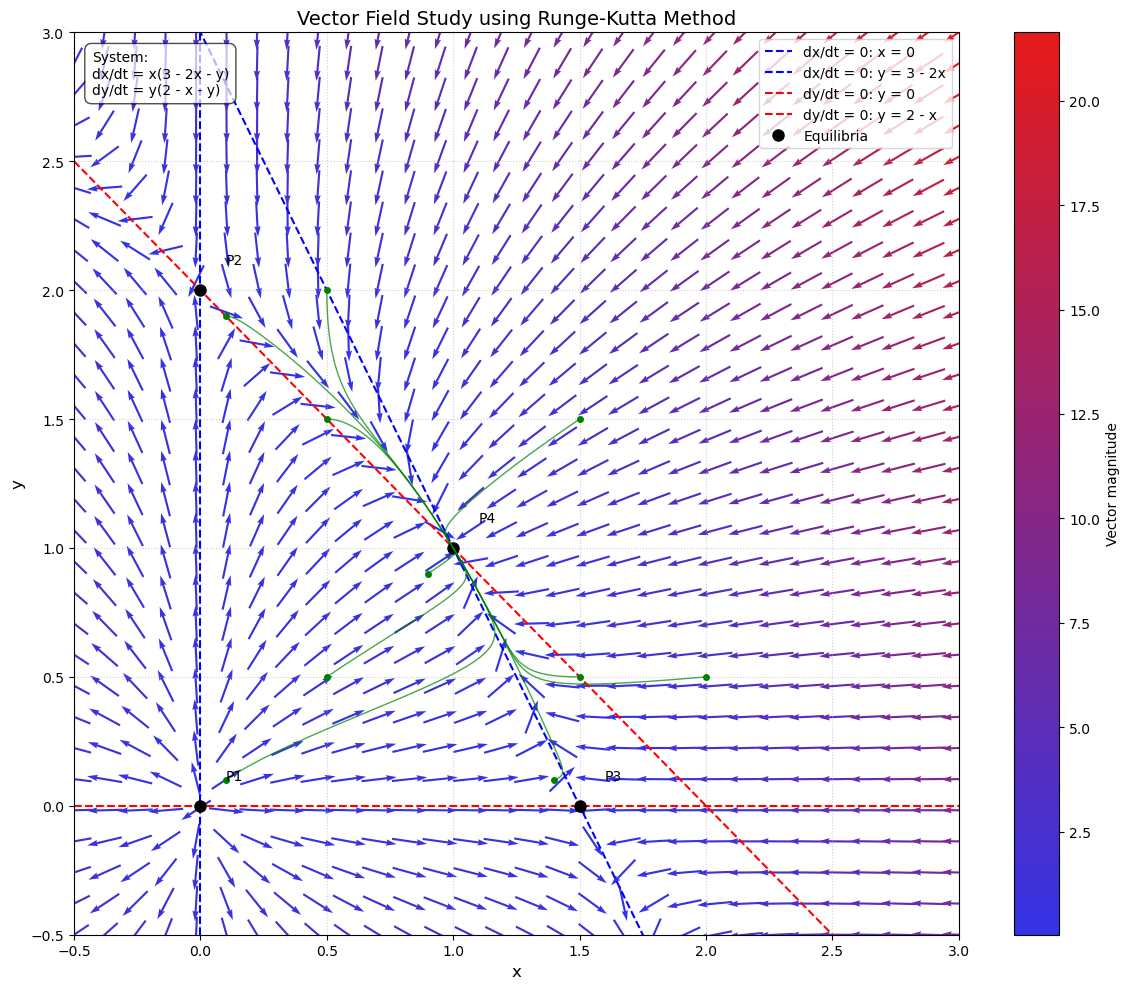


==== STABILITY ANALYSIS USING RUNGE-KUTTA SIMULATIONS ====
Testing perturbations around each equilibrium point...


===== EQUILIBRIUM POINT 1: (0, 0) =====
Direction: northeast (+x, +y)
  - Starting from: (0.10, 0.10)
  - Final position: (1.00, 1.00)
  - Distance moved: 1.2719
  - Final distance from equilibrium: 1.4134
  - Behavior: Moves away from equilibrium

Direction: northwest (-x, +y)
  - SKIPPED: Point (-0.10, 0.10) outside positive quadrant
Direction: southeast (+x, -y)
  - SKIPPED: Point (0.10, -0.10) outside positive quadrant
Direction: southwest (-x, -y)
  - SKIPPED: Point (-0.10, -0.10) outside positive quadrant
Summary for P1: 1 perturbations tested, 3 skipped
Stability: UNSTABLE (repelling)

===== EQUILIBRIUM POINT 2: (0, 2) =====
Direction: northeast (+x, +y)
  - Starting from: (0.10, 2.10)
  - Final position: (1.00, 1.01)
  - Distance moved: 1.4153
  - Final distance from equilibrium: 1.4083
  - Behavior: Moves away from equilibrium

Direction: northwest (-x, +y)
  - 

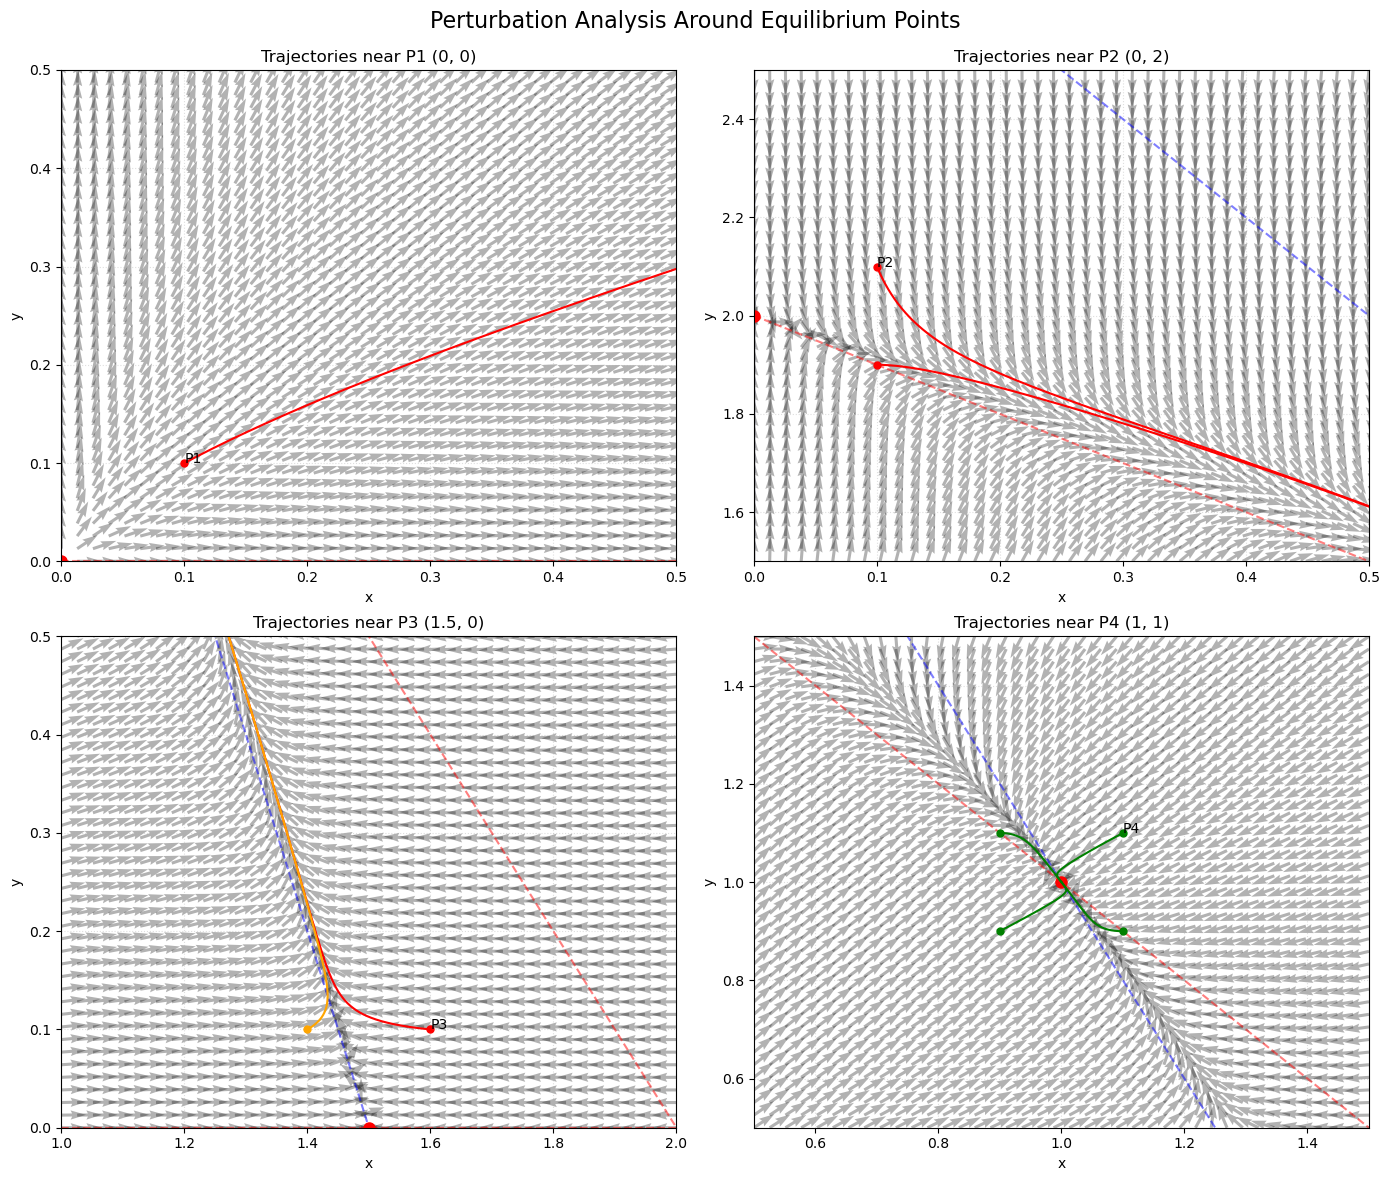

In [15]:
def study_vector_field_runge_kutta():
    """
    Study the vector field of the system using Runge-Kutta method:
    dx/dt = x(3 - 2x - y)
    dy/dt = y(2 - x - y)

    With longer and smoother trajectories
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap

    # Define the system of ODEs
    def system(t, state):
        x, y = state
        dx_dt = x * (3 - 2 * x - y)
        dy_dt = y * (2 - x - y)
        return np.array([dx_dt, dy_dt])

    # Implement Runge-Kutta 4th order method
    def rk4_step(f, t, y, h):
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h * k1 / 2)
        k3 = f(t + h / 2, y + h * k2 / 2)
        k4 = f(t + h, y + h * k3)
        return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    def simulate_trajectory(initial_state, t_max, dt):
        """Simulate a trajectory using RK4 from an initial state."""
        t_values = np.arange(0, t_max, dt)
        states = np.zeros((len(t_values), 2))
        states[0] = initial_state

        for i in range(1, len(t_values)):
            states[i] = rk4_step(system, t_values[i - 1], states[i - 1], dt)

        return states, t_values

    # Set up the grid for the vector field
    x_min, x_max = -0.5, 3
    y_min, y_max = -0.5, 3
    nx, ny = 30, 30  # Increased density for smoother vector field

    x_grid = np.linspace(x_min, x_max, nx)
    y_grid = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x_grid, y_grid)

    # Calculate vector field at each grid point
    DX = np.zeros((ny, nx))
    DY = np.zeros((ny, nx))

    for i in range(nx):
        for j in range(ny):
            state = np.array([X[j, i], Y[j, i]])
            derivatives = system(0, state)
            DX[j, i] = derivatives[0]
            DY[j, i] = derivatives[1]

    # Calculate vector magnitudes for coloring
    magnitudes = np.sqrt(DX**2 + DY**2)

    # Normalize vectors for better visualization
    magnitude_mask = magnitudes > 0
    DX_normalized = np.zeros_like(DX)
    DY_normalized = np.zeros_like(DY)
    DX_normalized[magnitude_mask] = DX[magnitude_mask] / magnitudes[magnitude_mask]
    DY_normalized[magnitude_mask] = DY[magnitude_mask] / magnitudes[magnitude_mask]

    # Create a custom colormap for the vector field
    colors = [(0.2, 0.2, 0.9), (0.9, 0.1, 0.1)]  # Blue to Red
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    # Create the figure
    plt.figure(figsize=(12, 10))

    # Plot the vector field
    plt.quiver(
        X,
        Y,
        DX_normalized,
        DY_normalized,
        magnitudes,
        cmap=custom_cmap,
        scale=25,
        pivot="mid",
    )
    plt.colorbar(label="Vector magnitude")

    # Define and plot isoclines
    x_range = np.linspace(x_min, x_max, 200)  # Increased points for smoother lines

    # x-nullclines: x = 0 and y = 3 - 2x
    plt.axvline(
        x=0, color="blue", linestyle="--", linewidth=1.5, label="dx/dt = 0: x = 0"
    )
    plt.plot(
        x_range, 3 - 2 * x_range, "b--", linewidth=1.5, label="dx/dt = 0: y = 3 - 2x"
    )

    # y-nullclines: y = 0 and y = 2 - x
    plt.axhline(
        y=0, color="red", linestyle="--", linewidth=1.5, label="dy/dt = 0: y = 0"
    )
    plt.plot(x_range, 2 - x_range, "r--", linewidth=1.5, label="dy/dt = 0: y = 2 - x")

    # Mark equilibrium points
    equilibria = [(0, 0), (0, 2), (1.5, 0), (1, 1)]
    plt.plot(
        [p[0] for p in equilibria],
        [p[1] for p in equilibria],
        "ko",
        markersize=8,
        label="Equilibria",
    )

    # Label equilibrium points
    for i, eq in enumerate(equilibria):
        plt.annotate(
            f"P{i+1}",
            xy=(eq[0], eq[1]),
            xytext=(eq[0] + 0.1, eq[1] + 0.1),
            fontsize=10,
        )

    # Simulate and plot trajectories from different initial conditions
    initial_conditions = [
        (0.1, 0.1),
        (0.1, 1.9),
        (1.4, 0.1),
        (0.9, 0.9),
        (0.5, 0.5),
        (0.5, 1.5),
        (1.5, 1.5),
        (1.5, 0.5),
        (2.0, 0.5),
        (0.5, 2.0),
    ]

    # Longer and smoother trajectories for main plot
    t_max = 20.0  # Increased time (was 10.0)
    dt = 0.005  # Smaller step size (was 0.01)

    for ic in initial_conditions:
        trajectory, _ = simulate_trajectory(ic, t_max, dt)
        plt.plot(trajectory[:, 0], trajectory[:, 1], "g-", linewidth=1, alpha=0.7)
        plt.plot(trajectory[0, 0], trajectory[0, 1], "go", markersize=4)  # Start point

    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.title("Vector Field Study using Runge-Kutta Method", fontsize=14)
    plt.grid(True, linestyle=":", alpha=0.6)
    plt.legend(loc="upper right", fontsize=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Add a text box with system information
    text_info = "System:\ndx/dt = x(3 - 2x - y)\ndy/dt = y(2 - x - y)"
    plt.text(
        0.02,
        0.98,
        text_info,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
        transform=plt.gca().transAxes,
        verticalalignment="top",
    )

    plt.tight_layout()
    plt.show()

    # Additional analysis - stability near equilibrium points with clearer output
    print("\n==== STABILITY ANALYSIS USING RUNGE-KUTTA SIMULATIONS ====")
    print("Testing perturbations around each equilibrium point...\n")

    # Define perturbation directions with meaningful names
    perturbations = [
        ((0.1, 0.1), "northeast (+x, +y)"),
        ((-0.1, 0.1), "northwest (-x, +y)"),
        ((0.1, -0.1), "southeast (+x, -y)"),
        ((-0.1, -0.1), "southwest (-x, -y)"),
    ]

    # Create a second figure for perturbation analysis
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()

    # Parameters for longer and smoother trajectories in detailed plots
    detail_t_max = 15.0  # Increased time (was 5.0)
    detail_dt = 0.002  # Smaller step size (was 0.01)

    for i, eq in enumerate(equilibria):
        print(f"\n===== EQUILIBRIUM POINT {i+1}: ({eq[0]}, {eq[1]}) =====")

        # Setup the subplot for this equilibrium
        ax = axs[i]

        # Define a finer grid for this subplot with more arrows
        margin = 0.5
        x_subplot_min = max(0, eq[0] - margin)
        x_subplot_max = eq[0] + margin
        y_subplot_min = max(0, eq[1] - margin)
        y_subplot_max = eq[1] + margin

        # Create a denser grid (more arrows) - using 40x40 instead of 30x30
        subplot_nx, subplot_ny = 40, 40
        x_subplot = np.linspace(x_subplot_min, x_subplot_max, subplot_nx)
        y_subplot = np.linspace(y_subplot_min, y_subplot_max, subplot_ny)
        X_subplot, Y_subplot = np.meshgrid(x_subplot, y_subplot)

        # Calculate vector field on this denser grid
        DX_subplot = np.zeros((subplot_ny, subplot_nx))
        DY_subplot = np.zeros((subplot_ny, subplot_nx))

        for ii in range(subplot_nx):
            for jj in range(subplot_ny):
                state = np.array([X_subplot[jj, ii], Y_subplot[jj, ii]])
                derivatives = system(0, state)
                DX_subplot[jj, ii] = derivatives[0]
                DY_subplot[jj, ii] = derivatives[1]

        # Normalize vectors for better visualization
        magnitudes_subplot = np.sqrt(DX_subplot**2 + DY_subplot**2)
        magnitude_mask_subplot = magnitudes_subplot > 0
        DX_normalized_subplot = np.zeros_like(DX_subplot)
        DY_normalized_subplot = np.zeros_like(DY_subplot)
        DX_normalized_subplot[magnitude_mask_subplot] = (
            DX_subplot[magnitude_mask_subplot]
            / magnitudes_subplot[magnitude_mask_subplot]
        )
        DY_normalized_subplot[magnitude_mask_subplot] = (
            DY_subplot[magnitude_mask_subplot]
            / magnitudes_subplot[magnitude_mask_subplot]
        )

        # Plot the vector field with more arrows
        ax.quiver(
            X_subplot,
            Y_subplot,
            DX_normalized_subplot,
            DY_normalized_subplot,
            alpha=0.3,
            scale=25,
            width=0.005,
        )

        # Plot nullclines - using more points for smoother lines
        detail_x_range = np.linspace(x_subplot_min, x_subplot_max, 200)
        ax.axvline(x=0, color="blue", linestyle="--", alpha=0.5)
        ax.plot(detail_x_range, 3 - 2 * detail_x_range, "b--", alpha=0.5)
        ax.axhline(y=0, color="red", linestyle="--", alpha=0.5)
        ax.plot(detail_x_range, 2 - detail_x_range, "r--", alpha=0.5)

        # Mark the equilibrium point
        ax.plot(eq[0], eq[1], "ro", markersize=8)
        ax.annotate(f"P{i+1}", xy=(eq[0], eq[1]), xytext=(eq[0] + 0.1, eq[1] + 0.1))

        # Plot perturbation trajectories
        tested = 0
        skipped = 0

        for perturb, direction_name in perturbations:
            perturbed_ic = (eq[0] + perturb[0], eq[1] + perturb[1])

            if perturbed_ic[0] < 0 or perturbed_ic[1] < 0:
                print(f"Direction: {direction_name}")
                print(
                    f"  - SKIPPED: Point ({perturbed_ic[0]:.2f}, {perturbed_ic[1]:.2f}) outside positive quadrant"
                )
                skipped += 1
                continue  # Skip negative values

            tested += 1
            # Use the updated parameters for longer, smoother trajectories
            trajectory, times = simulate_trajectory(
                perturbed_ic, detail_t_max, detail_dt
            )
            final_state = trajectory[-1]
            distance_from_start = np.linalg.norm(final_state - trajectory[0])
            distance_from_eq = np.linalg.norm(final_state - eq)

            # Plot the trajectory
            color = (
                "green"
                if distance_from_eq < 0.1
                else "orange" if distance_from_start <= 1.0 else "red"
            )
            ax.plot(trajectory[:, 0], trajectory[:, 1], color=color, linewidth=1.5)
            ax.plot(perturbed_ic[0], perturbed_ic[1], "o", color=color, markersize=5)

            # Determine behavior
            if distance_from_eq < 0.1:
                behavior = "Returns to equilibrium"
            elif distance_from_start > 1.0:
                behavior = "Moves away from equilibrium"
            else:
                behavior = "Oscillates or moves slowly"

            print(f"Direction: {direction_name}")
            print(f"  - Starting from: ({perturbed_ic[0]:.2f}, {perturbed_ic[1]:.2f})")
            print(f"  - Final position: ({final_state[0]:.2f}, {final_state[1]:.2f})")
            print(f"  - Distance moved: {distance_from_start:.4f}")
            print(f"  - Final distance from equilibrium: {distance_from_eq:.4f}")
            print(f"  - Behavior: {behavior}")
            print()

        ax.set_title(f"Trajectories near P{i+1} ({eq[0]}, {eq[1]})")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid(True, linestyle=":", alpha=0.4)

        # Set reasonable axis limits focused on this equilibrium
        ax.set_xlim(x_subplot_min, x_subplot_max)
        ax.set_ylim(y_subplot_min, y_subplot_max)

        # Print summary
        print(f"Summary for P{i+1}: {tested} perturbations tested, {skipped} skipped")

        # Determine stability type based on trajectories
        if tested > 0:
            behaviors = []
            for perturb, direction_name in perturbations:
                perturbed_ic = (eq[0] + perturb[0], eq[1] + perturb[1])
                if perturbed_ic[0] < 0 or perturbed_ic[1] < 0:
                    continue

                # Use updated parameters here too
                trajectory, _ = simulate_trajectory(
                    perturbed_ic, detail_t_max, detail_dt
                )
                final_state = trajectory[-1]
                distance_from_start = np.linalg.norm(final_state - trajectory[0])
                distance_from_eq = np.linalg.norm(final_state - eq)

                if distance_from_eq < 0.1:
                    behaviors.append("Returns to equilibrium")
                elif distance_from_start > 1.0:
                    behaviors.append("Moves away from equilibrium")
                else:
                    behaviors.append("Oscillates or moves slowly")

            all_return = all(b == "Returns to equilibrium" for b in behaviors)
            all_away = all(b == "Moves away from equilibrium" for b in behaviors)

            if all_return:
                print("Stability: STABLE (attracting)")
            elif all_away:
                print("Stability: UNSTABLE (repelling)")
            else:
                print(
                    "Stability: SADDLE POINT (attracting in some directions, repelling in others)"
                )

    plt.tight_layout()
    plt.suptitle("Perturbation Analysis Around Equilibrium Points", fontsize=16)
    plt.subplots_adjust(top=0.93)
    plt.show()

    return None


# Execute the analysis
study_vector_field_runge_kutta()